# Практическая работа №4

# КЛАССИФИКАЦИЯ ДАННЫХ НА ОСНОВЕ KNN-АЛГОРИТМА

Налало такое же как и в 3 практической работе. Импортируем библиотеки и подготовим данные для обучения.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
path = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
headernames = list(range(1, 58)) + ['Class']
dataset = pd.read_csv(path, names=headernames)
dataset

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

Проведём первые тесты KNN классификатора на исходных данных.

In [4]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.7935904399782727

Правильное регулирование масштбов значений данных повышает эффективность работы модели. Особенно это ощущается при использовании алгоритма K ближайших соседей.

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9076588810429115

Начнём подбор более оптимальных параметров. Начнём с подбора числа соседей. Я написал свою функцию подбора определённого параметра модели машинного обучения.

In [7]:
def search_param(model, param, X_train, y_train, X_val, y_val, area=range(1, 11), msg=True, plot=True):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#     accuracy  time')
    for i in area:
        start = time.time()
        if str(type(i)) == "<class 'str'>":
            mod = eval(model + "(" + param + "='" + i + "')")
        else:
            mod = eval(model + '(' + param + '=' + str(i) + ')')
        mod.fit(X_train, y_train)
        s = mod.score(X_val, y_val)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%3s %10f  %7f" % (str(i), s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

9

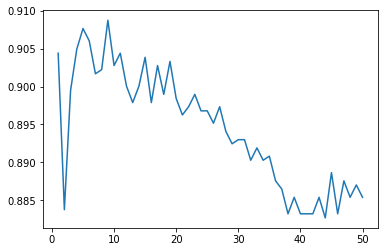

In [8]:
search_param('KNeighborsClassifier', 'n_neighbors', X_train, y_train, X_test, y_test, area=range(1, 51), msg=False)

Как мы можем убедиться,при использовании классической метрики увеличение числа соседей приводит к понижению эффективности.

Подберём оптимальную метрку для данного классификатора. Будем использовать всё ту же функцию *search_param*.

In [9]:
search_param('KNeighborsClassifier', 'metric', X_train, y_train, X_test, y_test, area=['euclidean', 'manhattan', 'chebyshev', 'minkowski'], plot=False)

#     accuracy  time
euclidean   0.907659  1.025857
manhattan   0.912548  0.951035
chebyshev   0.875068  1.069546
minkowski   0.907659  1.019098


'manhattan'

Использование манхэтенской метрики является наиболее оптимальным решением. Точность повсилась на 0,5% по сравнению с классической евклидовой метрикой.

In [10]:
clf3 = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.913090711569799

Подберём оптимальное число соседий для найденной оптимальной метрики.

In [11]:
def search_param2(model, param, X_train, y_train, X_val, y_val, area=range(1, 11), msg=True, plot=True):
    import matplotlib.pyplot as plt
    import time
    score_list = []
    if msg:
        print('#     accuracy  time')
    for i in area:
        start = time.time()
        if str(type(i)) == "<class 'str'>":
            mod = eval("KNeighborsClassifier(metric = 'manhattan', " + param + "='" + i + "')")
        else:
            mod = eval("KNeighborsClassifier(metric = 'manhattan', " + param + '=' + str(i) + ')')
        mod.fit(X_train, y_train)
        s = mod.score(X_val, y_val)
        end = time.time()
        score_list.append(s)
        if msg:
            print("%3s %10f  %7f" % (str(i), s, end - start))
    if plot:
        plt.plot(list(area), score_list)
    return list(area)[score_list.index(max(score_list))]

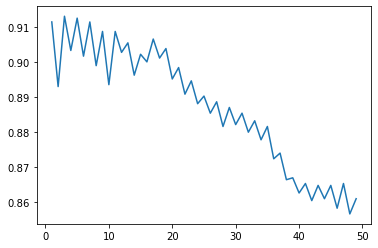

In [12]:
k = search_param2('KNeighborsClassifier', 'n_neighbors', X_train, y_train, X_test, y_test, area=range(1, 50), plot=True, msg=False)

In [13]:
clf4 = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
clf4.fit(X_train, y_train)
clf4.score(X_test, y_test)

0.913090711569799

Итоговый результат:

In [14]:
y_pred = clf4.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1041   62]
 [  98  640]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1103
           1       0.91      0.87      0.89       738

    accuracy                           0.91      1841
   macro avg       0.91      0.91      0.91      1841
weighted avg       0.91      0.91      0.91      1841

Accuracy: 0.913090711569799


## Для ирисов Фишера

In [15]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)

In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_pred = classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[916 190]
 [226 509]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1106
           1       0.73      0.69      0.71       735

    accuracy                           0.77      1841
   macro avg       0.77      0.76      0.76      1841
weighted avg       0.77      0.77      0.77      1841

Accuracy: 0.7740358500814775


Полученный результат показывает нам,что для разных денных необходимо побирать уникальные параметры модели. Эффективная модель для одних данных может быть совершенно неэффективна для других.